# Introduction

&emsp;&emsp;According to U.S. constitutional law, police officers are not allowed to stop an individual without probable cause or reasonable suspicion. As a result, it is unconstitutional to stop a person without prior observations that they may have broken the law or have a warrant for search or arrest. This also means that a police officer cannot stop a person on the basis of their appearance like their perceived sex, gender, race, etc. What if, however, there is disparate treatment in stopping individuals because of their perceived race? This paper analyzes traffic stops in San Diego from 2013 to 2017 as an investigation into whether or not inequities exist in the police's treatment of individuals, and through consideration of various notions of fairness quantified by statistical analyses, finds that there does exist inequity in the data given numerous assumptions. First, the historical and social context of the issue is discussed with various notions of fairness in mind; then follows a technical exploration into the data with commentary on why it is appropriate for analyzing this problem. Afterwards, this paper dives into the analysis of the inequity with respect to fairness, then it finally interprets these results and returns to the social lens of the problem with their implications and limitations.

&emsp;&emsp;Various other studies have been conducted on inequities in traffic stops including an investigation suggesting that time helps to mask a person's race, leading to police officers stopping Black individuals less (Pierson et al., 2020). Another looks at differing ratios of contraband discoveries to searches among the races, implying that one race is discriminated against: less findings of contraband with one race compared to another would mean that one race is searched more often than the other (Baumgartner et al., 2016). Additionally, Chanin et al. (2018) examines other outcomes of the stop, citations or arrests, in a similar fashion to looking at contraband findings that show disproportionate rates among the races.

# Background

Reinforcement of Racial Ideologies
---

&emsp;&emsp;Racial inequity has long been a problem in society from scientific racism and physiognomy (Arcas et al., 2017) to facial recognition software correctly identifying individuals of varying races and genders at disproportionate rates (Buolamwini, 2017). It is perpetuated through the many layers of power in the structural, disciplinary, hegemonic, and interpersonal domains of the matrix of domination (D'Ignazio & Klein, 2020). These domains protect and give power to the privileged through various systematic and cultural means.

&emsp;&emsp;When considering police traffic stops, all four domains are involved. Oppression from the structural domain originates from the ambiguity of the U.S. Constitution which declares that "the right of the people to be secure... against unreasonable searches and seizure, shall not be violated, and no Warrants shall issue, but upon probable cause..." (U.S. Const., Amend. IV, 1789). Consequently, the Supreme Court has been left to define the meaning of "probable cause" which has resulted in the phrase being flexible in any situation, meaning that police officers can potentially use any possible legitimate reason as "probable cause" as an implicit way to stop, search, or arrest people of one race more than another. Furthermore, the disciplinary domain acts directly in that it "implements and enforces laws and policies" (D'Ignazio & Klein, 2020), which in this context, refers to the police officers who enforce the law by stopping people with probable cause on suspicion of illegal activity. Straying away from infrastructure, the hegemonic domain perpetuates racial inequity through both culture and media, able to influence and instill racist ideals in law enforcers who may manifest their biases through contact with other people. Finally, the interpersonal domain in this context refers to the personal interactions that individuals have with police officers when stopped, as "more than 20 million Americans are stopped each year for traffic violations" (Pierson et al., 2020).

Justice for All
---

&emsp;&emsp;Discrimination on the basis of race violates various notions of fairness and distributive justice; in particular, Equality of Opportunity is infringed upon when disparate treatment occurs due to racism. Rawlsian Formal Equality of Opportunity as discussed by Heidari et al. (2018) asserts that two individuals with the same effort and merit should receive the same benefit or utility regardless of uncontrollable circumstances such as sex or race (Lamont & Favor, 2017). In this paper, fairness is measured by how well the data falls in line with Equality of Opportunity, and when applied to the context of police traffic stops, it means that the existence of a racial inequity would violate Rawlsian Formal Equality of Opportunity. For instance, if person A and B are of different races who are stopped under suspicion of possessing contraband, it follows under Equality of Opportunity to conduct an arrest for person B if an arrest is conducted for person A as well. 

&emsp;&emsp;As will be observed, these ideas of Equality of Opportunity are applied statistically in the following sections, determining whether arrests between individuals with the same criminality but differing races occur at varying rates. The claim is that the rates at which people of the same criminality but differing races should be similar if not equal; otherwise, Equality of Opportunity is violated, and discrimination does play a role in police traffic stops. Note how this assumes that criminality comes from individual choice, holding the individual accountable for their own actions, and race has no role in this since it is an uncontrollable feature.

# Data Exploration

Preview
---

&emsp;&emsp;In this section, preliminary exploratory data analysis is done through computing descriptive analyses and checking features in order to assess if it is feasible to conduct an analysis with the data. Namely, check for group membership, sufficient variation in the data, and whether or not an individual's criminality can be measured. Commentary will also be provided alongside the analyses for interpretation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path = "data.zip"
data = pd.read_csv(path)

In [3]:
data = data.dropna(subset = ["subject_race"])

In [4]:
data["subject_race"] = data["subject_race"].str.title()

&emsp;&emsp;Here is the racial composition of subjects listed in the dataset with most subjects being White and least of them being marked as "Other". Note that Asian / Pacific Islander and Other categories make up less than 10% of the data, possibly hinting towards underrepresentation which could indicate sampling biases.

In [5]:
data["subject_race"].value_counts(normalize = True)

White                     0.424906
Hispanic                  0.306666
Black                     0.111854
Asian/Pacific Islander    0.085232
Other                     0.071342
Name: subject_race, dtype: float64

In [6]:
#data["subject_race"].value_counts(normalize = True).mean()

In [7]:
#data["subject_race"].value_counts(normalize = True).std()

Text(0, 0.5, 'Relative Frequency (Proportion)')

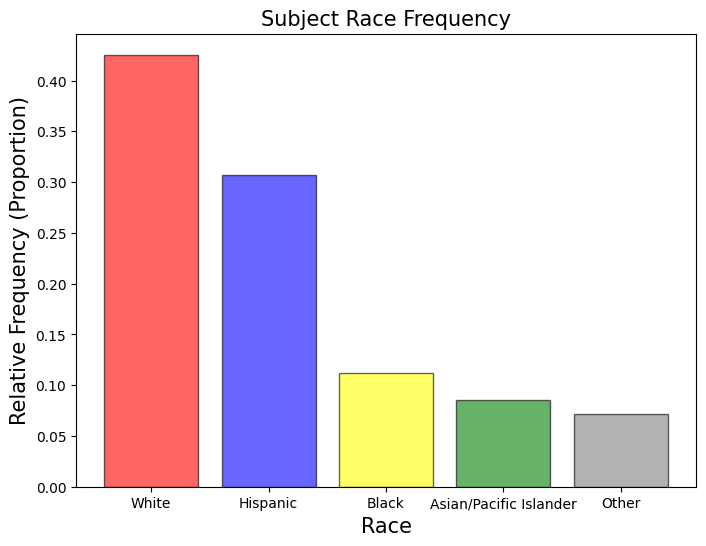

In [8]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)
plt.bar(
    data["subject_race"].value_counts(normalize = True).index, 
    data["subject_race"].value_counts(normalize = True), 
    color = ["red", "blue", "yellow", "green", "gray"], 
    edgecolor = "black",
    alpha = 0.6
)
plt.title("Subject Race Frequency")
plt.xlabel("Race")
plt.ylabel("Relative Frequency (Proportion)")

&emsp;&emsp;Above is a bar chart displaying the racial makeup of the data, coinciding with White folks making up most of the dataset as the computed proportions above have shown. Again, note how Asian / Pacific Islanders and Others are below the 10% mark.

In [9]:
#data["outcome"].value_counts(normalize = True)

Looking into Arrests Made
---

&emsp;&emsp;The biggest problem with conducting a statistical analysis with a focus on the entire dataset is that there are no negative labels. In other words, there is no record of an individual *not* being stopped by police, so there would be no way to compare rates of people being stopped between the varying races. Thus, instead of thinking of "stopped / not stopped" as the outcome, this paper decides to look at "arrested / not arrested". As a result, a thorough examination can be done for both people who were arrested and those who were not arrested, as there exist records of people who were stopped but not arrested and those were were arrested. The other justification comes from how compared to leaving with a mere warning or a citation, arrests are a more severe outcome for individuals, so any statistically significant results yielded from the analysis would have serious implications, considering how disparate treatment in arrests would be more severe than disparate treatment in giving warnings.

&emsp;&emsp;Here is the racial composition of individuals given that they were arrested. Even with the condition that an arrest was made, Asian / Pacific Islanders and Others make up less than 10% of this population. Low percentages for the total population and low percentages for the arrested population would imply that in the scope of the whole dataset, these individuals make up even less of the whole population. Any statistical analyses done on these categories should exercise caution when making interpretations due to the underrepresentation of these groups.

In [10]:
arrests = data[data["outcome"] == "arrest"]
arrests["subject_race"].value_counts(normalize = True)

White                     0.368115
Hispanic                  0.356267
Black                     0.178133
Asian/Pacific Islander    0.064228
Other                     0.033257
Name: subject_race, dtype: float64

In [11]:
#arrests["subject_race"].value_counts(normalize = True).mean()

In [12]:
#arrests["subject_race"].value_counts(normalize = True).std()

Text(0, 0.5, 'Relative Frequency (Proportion)')

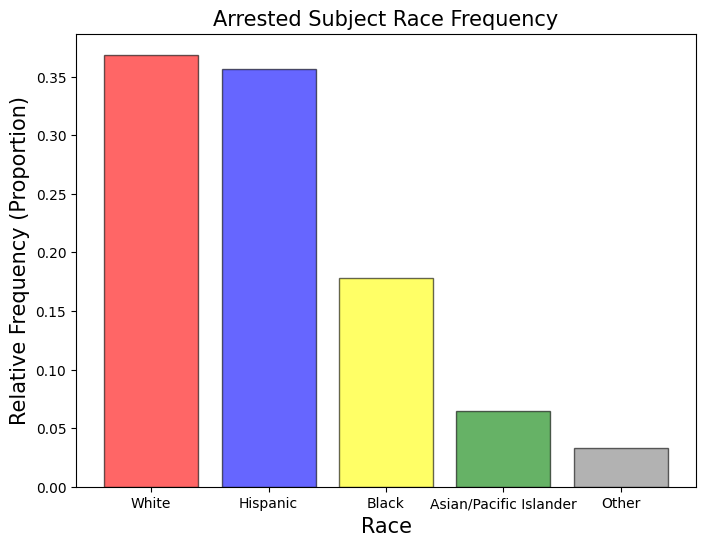

In [13]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)

plt.bar(
    arrests["subject_race"].value_counts(normalize = True).index, 
    arrests["subject_race"].value_counts(normalize = True),
    color = ["red", "blue", "yellow", "green", "gray"],
    edgecolor = "black",
    alpha = 0.6
)
plt.title("Arrested Subject Race Frequency")
plt.xlabel("Race")
plt.ylabel("Relative Frequency (Proportion)")

&emsp;&emsp;Above is a bar chart displaying the racial makeup of subjects who were arrested, coinciding with White folks making up most of the individuals as the computed proportions above have shown; curiously, both Hispanic and Black frequencies have notably increased compared to the general population. Again, observe how Asian / Pacific Islanders make up less than 10% of this group with Others composing even less.

Measuring Severity
---

&emsp;&emsp;In order to measure severity of an infraction / criminalty of an individual and determine if Equality of Opportunity holds, a measurement is needed, so the `reason_for_stop` feature is considered, and if the individual was searched, the `reason_for_search` is added as well. The total severity measurement comes from counting the total number of reasons a police officer had to stop and / or search a particular individual. To sum up:

$$severity_{total} = \# \, reasons_{stop} + \# \, reasons_{search}$$

&emsp;&emsp;Note that because this measurement is derived from reasons to stop and not actual outcomes, it is a proxy of criminality at best. It is also important not to forget that data collection is left up to officers, so they ultimately have the say in what justifies a stop / search, so they are bound to be incorrect in their justifications, seeing as how they can miss an infraction or wrongly judge that a person is potentially guilty of illegal activity. On top of this, if the police officers are racially biased, then this measurement could also be racially biased; after all, they could allocate more severe reasons to stop / search an individual than another of differing races. This paper assumes this measurement is representative of an individual's criminality, but it is important to keep these points in mind.

In [14]:
def count_reasons(sequence):
    if type(sequence) == str:
        if '|' in sequence:
            return len(sequence.split('|'))
        else:
            return 1
    else:
        return 0

In [15]:
data["severity_stop"] = data["reason_for_stop"].apply(count_reasons)
data["severity_search"] = data["reason_for_search"].apply(count_reasons)
data["severity_total"] = (data["severity_stop"] + data["severity_search"])
severity_total_max = data["severity_total"].max()
#data[["arrest_made", "severity_stop", "severity_search", "severity_total"]].head()

In [16]:
def make_severity_total_pivot(df):
    race_severity_groups = df.groupby(["subject_race", "severity_total"]).size()
    dummy = pd.DataFrame(
        [(race, i, np.nan, np.nan) for race in df["subject_race"].unique() for i in range(severity_total_max + 1) if i not in race_severity_groups[race].index],
        columns = ["subject_race", "severity_total", False, True]
    ).set_index(keys = ["subject_race", "severity_total"])
    
    df_severity = df[["subject_race", "severity_total", "arrest_made"]]
    
    pivot_severity_total = pd.concat([df_severity.pivot_table(
        index = ["subject_race", "severity_total"],
        columns = "arrest_made",
        aggfunc = "size"
    ), dummy]).fillna(0).astype("int").sort_values(["subject_race", "severity_total"])
    
    return pivot_severity_total

def pivot_counts_to_ratios(pivot_table):
    pivot_table_ratios = pivot_table.copy()
    pivot_table_sums = pivot_table.sum(axis = 1)
    for indices in pivot_table.index:
        if pivot_table_sums[indices] != 0:
            pivot_table_ratios.loc[indices] /= pivot_table_sums[indices]
            
    return pivot_table_ratios

In [17]:
pivot_severity_total = make_severity_total_pivot(data)
pivot_severity_total_ratios = pivot_counts_to_ratios(pivot_severity_total)
#pivot_severity_total_ratios

&emsp;&emsp;Because a myriad of (`subject_race`, `severity_total`) groups consist of little to no individuals, analyzing the data at this granularity will yield little statistical significance. Since it appears to be the case that arrests increase drastically at a total severity of 2, use this value as a threshold for determining who is severe vs. not severe instead of working with each possible severity value. Of course, setting 2 as a threshold introduces bias not in the dataset but into the data analysis, as the threshold is subjective. Ideally, multiple trials should be done with differing thresholds to see if they yield differing results, then choose the best threshold. Ultimately though, 2 is chosen as the threshold for severity.

&emsp;&emsp;A pivot table of arrests made conditioned on a subject's race and whether or not they would be considered "severe" is shown below. Note how given that an individual is Black and considered severe, the arrest rate seems low compared to if an individual is White and considered severe.

In [18]:
data["is_severe"] = (data["severity_total"] >= 2)
data_is_severe = data[["subject_race", "is_severe", "arrest_made"]]

pivot_is_severe = data_is_severe.pivot_table(
    index = ["subject_race", "is_severe"],
    columns = "arrest_made",
    aggfunc = "size"
).fillna(0).astype("int")
pivot_is_severe_ratios = pivot_counts_to_ratios(pivot_is_severe)
pivot_is_severe_ratios

arrest_made                          False      True
subject_race           is_severe                    
Asian/Pacific Islander False      0.996237  0.003763
                       True       0.752795  0.247205
Black                  False      0.993801  0.006199
                       True       0.817396  0.182604
Hispanic               False      0.994842  0.005158
                       True       0.791516  0.208484
Other                  False      0.996569  0.003431
                       True       0.796834  0.203166
White                  False      0.995462  0.004538
                       True       0.720050  0.279950

In [19]:
#pivot_is_severe_ratios.reset_index()[pivot_is_severe_ratios.reset_index()["is_severe"] == True].drop(columns = ["is_severe"]).set_index("subject_race").describe()[True]

Summary
---

This data source seems appropriate for investigating racial inequity in arrests made in San Diego traffic stops for the following reasons:

- It has differing races.
- The proportions for arrested individuals arrest conditioned on subject race are spread considerably (standard deviation of about 15%).
- There is sufficient variation in the racial composition of arrested individuals who are considered severe; consider 18% vs. 28%.
- A measurement for severity can be derived and used for applying notions of Equality of Opportunity on the dataset.

However, there are various limitations discovered that could hinder the statistical power of the data analysis:

- Some racial groups are possibly underrepresented with Asians / Pacific Islanders and Other races making up 8.5% and 7.1% of the dataset, respectively; therefore, any statistical analyses done involving Asians / Pacific Islanders or Other races may yield results not representative of Asians / Pacific Islanders or Other races for subjects stopped by police in San Diego. It is possible that this is caused by sampling bias where individuals of certain races happen to be stopped more than others, resulting in overrepresentation of those races (White and Hispanic individuals as seen from the racial composition of the dataset) and underrepresentation of Asians / Pacific Islanders and Other races.
- The race labels are ambiguous like with how "Other" is not explicitly known to express a certain number of "other" races or is used as a catch-all categorization. With this in mind, this probably is a consequence of which racial categories have the political representation and power to allow themselves to be classified. "Asians / Pacific Islanders" is not specific as to if Asian Indians are included or not, and ultimately, because the data collection comes from police records, it is most likely left up to the individual police officers to categorize people into racial groups. Assuming that the results of the data analysis are valid, any results concerning these racial groups will be difficult to interpret for actual individuals beyond these abstract labels.
- This type of racial categorization fails to accommodate for individuals of multiple races, and if people of multiple races are included, it is not known if they are fit into one category or are counted multiple times in the dataset. As mentioned above, data collection is subjectively left up to police officers to make records, so they decide which racial category to place individuals into. If the subject does not specify their race, police officers most likely infer from appearance which is subjective, as two different officers could classify the same individual into differing racial categories. If this is true, then there could exist incorrect race labels for individuals which would bias the dataset in wrongly giving more representation to an incorrectly classified race instead of the category they most likely belong to under this system. If people of differing races happen to have differing behaviors, then this could hurt racial representation even more since an individual with an incorrectly classified race label would become an outlier and possibly skew proportions. This is even more so the case for the "Asian / Pacific Islander" and "Other" groups since they are the most underrepresented categories of the dataset. 
- As a follow up, one should repeat that, as mentioned before, data collection by the police is bound to be subjective, as are reasons to stop / search an individual which are left up to the discretion of the officer. If officers are racially biased, they could allocate more "severe" reasons to stop / search an individual depending on their race. If this is true, then the dataset is already biased, meaning any data analyses that results will also be biased.
- The measurement used and computed is a proxy of "severity" of an individual, meaning it may not necessarily be accurately representative of that particular person's criminal behavior since it is possible for someone to be stopped for possessing contraband, then found to not have any, but it is also true that people who possess contraband may not be recorded for this in the reasons due to the officer being unaware of it. In other words, there is bound to be false positives and false negatives in the recorded reasons for stopping / searching an individual. Also, as mentioned in the point directly above, if officers have implicit biases, then not only is this measurement of severity a proxy of criminality at best, it also could potentially have racial bias encoded in it from the onus of data collection being on the officers themselves.
- Assuming everything else is valid and that there are no racial biases encoded in the measurement of severity used, its biggest flaw is in assuming that all reasons to stop / search an individual are the same, as all reasons are counted the same. Some reasons will ultimately be more severe than others (e.g., 1 Moving Violation vs. 1 Possession of Contraband); however, there is no systematic way to determine the weight of each *possible* infraction of the law.

&emsp;&emsp;Overall, this dataset does have differing races and seemingly variable rates of arrests, giving it potential for an investigation to be conducted; however, the underrepresentation and potential overrepresentation of certain racial groups, the ambiguity of race labels, subjectivity of data collection, and the inherent flaws of the measurement to be used are considerations that could certainly predetermine results from any statistical analysis to be biased and also inaccurately represent a racial category from poor representation of that race in the dataset.

# Statistical Analysis

Formulating Equality of Opportunity
---
&emsp;&emsp;Assuming that there is no bias in the dataset and before a deep dive into analysis is undergone, it is important to note that two specific notions of Equality of Opportunity studied by Heidari et al. (2018) in their framework are applied statistically to the data: Rawlsian Formal Equality of Opportunity and Luck Egalitarian Equality of Opportunity. These two parity measures were chosen specifically because other parity measures like Accuracy Parity, Statistical Parity, Equality of Odds, and Predictive Value Parity depend on the predictions of a classifier either from a standard decision making algorithm or a machine learning classifier whereas these measures do not depend on those predictions.

&emsp;&emsp;The main difference between Rawlsian Formal Equality of Opportunity and Luck Egalitarian Equality of Opportunity rely on recognition of racial categories as having different distributions. That is, Rawlsian Formal Equality of Opportunity takes an absolutist view and assumes that the distributions of individuals between races look similar; on the other hand, Luck Egalitarian Equality of Opportunity views these distributions in a relative scope, comparing quantiles of each distribution (e.g., the top 10% from race A with the top 10% from race B). Quantitatively, the equations derived by Heidari et al. (2018) hold:

$$ $$
**Rawlsian Formal Equality of Opportunity**:

&emsp;&emsp;If $F$ is a utility function allocating goods, benefits, or opportunities to an individual as $x$, $e$ represents effort or attributes for which the individual is fully accountable and responsible for, and $c$ represents uncontrollable circumstances like race, then the following holds:
$$F(x|e,c)=F(x|e,c')$$
This implies that the distribution of utility to individuals of the same merit, effort, accountable choices should be the same as well regardless of their uncontrollable circumstances. In other words, if the utility function depends on these circumstances, then Rawlsian Formal Equality of Opportunity is violated.
When put into the context of analyzing arrests, utility is a welfare here, deciding whether or not an individual should be arrested (thereby restricting their liberty). $x$ represents an individual, $e$ represents an individual's criminalty since it reflects the choices and attributes that they are responsible for, and $c$ represents race, the uncontrollable circumstance of which a potential inequity may exist. For instance, if two individuals who are both considered severe but of differing races receive different outcomes with one being arrested and the other not being arrested, then Rawlsian Formal Equality of Opportunity is violated because this implies that race, the uncontrollable circumstance, plays a role in making these decisions.

$$ $$
**Luck Egalitarian Equality of Opportunity**:

&emsp;&emsp;Reusing $F$, $x$, and $c$, Luck Egalitarian Equality of Opportunity introduces a new variable, $q$, to represent the quantile at which the individual lies in the distribution of people given by the same uncontrollable circumstances. Then, this equation holds:
$$F(x|q,c)=F(x|q,c')$$
This implies that the distribution of utility to individuals who are at the $qth$ quantile in their respective distributions should be equal. In other words, if the utility function depends on uncontrollable circumstances in this relative view of "merit", then similar as above, Luck Egalitarian Equality of Opportunity is violated.
In the context of the data analysis, utility and $x$ are the same here as above, representing liberty and an individual, respectively. The new variable $q$ would be the quantile at which an individual is located in the distribution for their racial group. To put into words, this definition would compare the arrest rate of the top $q*100\%$ most severe individuals of one race with the arrest rate of the top $q*100\%$ most severe individuals of another race. If the arrest rates are different, then this implies that the uncontrollable circumstance, race, is at play in giving utility to individuals; hence, Luck Egalitarian Equality of Opportunity is violated.

$$ $$
&emsp;&emsp;In general, the way these notions of equality are applied in the data relies on examining individuals of comparing severity, whether that be in absolute terms or with a relative view, but differing races as well to see if their rates of being arrested differ. Ergo, if the rates differ by a statistically significant amount, then a potential inequity exists in the data, and a follow up investigation is done to ascertain which specific race is being discriminated against. A general process for conducting a statistical analysis for each definition of fairness is given:

1. Define a statistical hypothesis test given the notion of fairness in focus to first determine if a racial inequity exists in the data.
2. Run 100 random simulations assuming that race, the uncontrollable circumstance, is irrelevant in order to produce an expected distribution of the test statistic.
3. Compare the test statistic with the expected distribution to obtain a p-value, the probability of seeing the observed value within the expected distribution. A low probability implies that the observed value is extreme and not produced as a result of random chance whereas a high probability implies that the observed value can be observed within the expected distribution with a high chance.
4. If the hypothesis test yields a statistically significant result, conduct another test to determine which race is being discriminated against.

Applying Rawlsian Formal Equality of Opportunity
---
&emsp;&emsp;In order to assess whether or not Rawlsian Formal Equality of Opportunity is violated, it is necessary to quantify whether the differences in arrest rates between people considered severe / not severe but of differing races are statistically significant. The statistical test to perform is as follows:

- Null Hypothesis: The rates of arrests between individuals who are similarly considered "severe" / "not severe" but of differing races are less spread out, implying similarity.
- Alternative Hypothesis: The rates of arrests between individuals who are similarly considered "severe" / "not severe" but of differing races are more spread out, implying inequality.

Fix a significance level of 0.01.

The test statistic to consider is computing, $\sigma_{severe}$, the standard deviation of the distribution of arrest rates as given by each race for individuals considered "severe", then add it to, $\sigma_{not\,severe}$, the standard deviation of the distribution of arrest rates as given by each individuals considered "not severe". Thus, the test statistic is as follows:

$$\sigma_{total} = \sigma_{severe} + \sigma_{not\,severe}$$

The reasoning is that if Rawlsian Formal Equality of Opportunity holds, then the rates of arrests for subjects considered severe / not severe should be similar between the races. In technical terms, this means we expect $\sigma_{total} \approx 0$ since larger values of $\sigma_{total}$ imply that the distribution of arrest rates has more variation. For instance, arrest rates for people considered severe that look like $\{0.2, 0.2, 0.2, 0.2, 0.2\}$ among the races is ideal and have should have $\sigma_{severe} = 0$. If $\sigma_{severe} > 0$, then the distribution of arrest rates vary, meaning it is possible that there is inequity in arresting people considered severe.

In [20]:
def total_sds_is_severe(pivot_ratios):
    pivot_ratios_severe = pivot_ratios.reset_index()[pivot_ratios.reset_index()["is_severe"] == True].drop(columns = ["is_severe"]).set_index("subject_race")
    pivot_ratios_not_severe = pivot_ratios.reset_index()[pivot_ratios.reset_index()["is_severe"] == False].drop(columns = ["is_severe"]).set_index("subject_race")
    
    return pivot_ratios_severe[True].std() + pivot_ratios_not_severe[True].std()

&emsp;&emsp;The observed $\sigma_{total}$ is as shown below. This means that in reality, the distribution of rates of arrests for subjects both severe and considered not severe between the races are spread out from the mean by $4\%$. $4\%$ seems certainly close to $0\%$, but whether or not this is statistically significant will be determined in the following test.

In [21]:
is_severe_statistic_observed = total_sds_is_severe(pivot_is_severe_ratios)
is_severe_statistic_observed

0.040023959934947576

In [22]:
significance = 0.01

is_severe_results = []
data_is_severe_random = data_is_severe.copy()

for i in range(100):
    shuffled_race = data_is_severe["subject_race"].sample(frac = 1, replace = False, random_state = i, ignore_index = True)
    data_is_severe_random["subject_race"] = shuffled_race
    pivot_is_severe_random = data_is_severe_random.pivot_table(
        index = ["subject_race", "is_severe"],
        columns = "arrest_made",
        aggfunc = "size"
    ).fillna(0).astype("int")
    pivot_is_severe_random_ratios = pivot_counts_to_ratios(pivot_is_severe_random)
    statistic_simulated = total_sds_is_severe(pivot_is_severe_random_ratios)
    is_severe_results.append(statistic_simulated)
    
is_severe_p_value = (pd.Series(is_severe_results) >= is_severe_statistic_observed).mean()
#print(f"p-value: {is_severe_p_value} \nReject Null Hypothesis: {is_severe_p_value <= significance}")
print(f"p-value: {is_severe_p_value}")

p-value: 0.0


<Figure size 800x600 with 0 Axes>

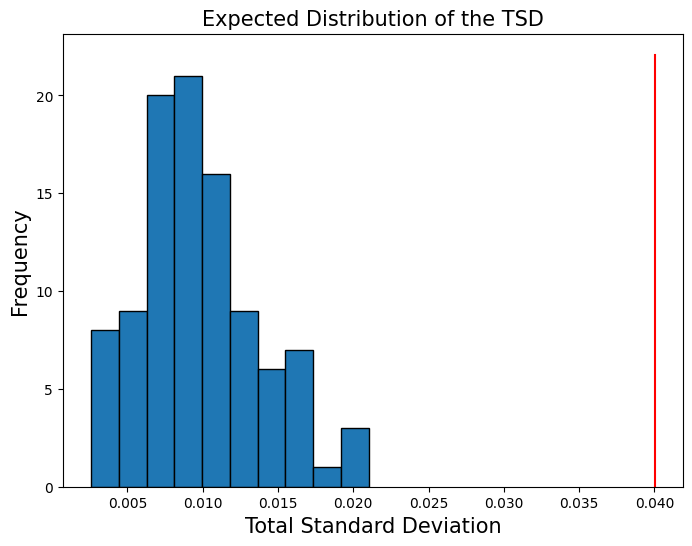

In [23]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)

plots, ax = plt.subplots(1, 1, figsize = (8, 6), dpi = 100)
ax.hist(
    is_severe_results,
    edgecolor = "black"
)
plt.title("Expected Distribution of the TSD")
plt.xlabel("Total Standard Deviation")
plt.ylabel("Frequency")
plt.plot([is_severe_statistic_observed, is_severe_statistic_observed], [ax.get_ylim()[0], ax.get_ylim()[1]], color = "red")

&emsp;&emsp;The distribution of $\sigma_{total}$ under the null hypothesis is shown above with the red line representing the position of the observed $\sigma_{total}$. As one may see, observed $\sigma_{total}$ is nowhere near the expected distribution. In fact, it is abnormally high and extreme, meaning that the variation in arrest rates for individuals considered severe \ not severe between races is statistically significant and not due to random chance.

&emsp;&emsp;Through 100 random simulations to generate a distribution of test statistics under the null hypothesis assumption, the test yielded a p-value of 0.0. Assuming this result is valid, this is an extremely low p-value. This means that the probability of seeing $\sigma_{total}=4\%$, assuming race does not matter, is 0.0% which is below the set significance of 0.01. Thus, reject the null hypothesis with extreme confidence that most likely, there is a potential racial inequity in the data.

In [24]:
def diffs_in_means_bw(pivot_ratios):
    pivot_ratios_is_severe = pivot_ratios.reset_index()[pivot_ratios.reset_index()["is_severe"] == True].drop(columns = ["is_severe"]).set_index("subject_race")[True]
    pivot_ratios_not_severe = pivot_ratios.reset_index()[pivot_ratios.reset_index()["is_severe"] == False].drop(columns = ["is_severe"]).set_index("subject_race")[True]
    white_is_severe = pivot_ratios_is_severe.loc["White"]
    black_is_severe = pivot_ratios_is_severe.loc["Black"]
    white_not_severe = pivot_ratios_not_severe.loc["White"]
    black_not_severe = pivot_ratios_not_severe.loc["Black"]
    return (white_is_severe - black_is_severe) + (white_not_severe - black_not_severe)

&emsp;&emsp;Because the spread in arrest rates turned out to be statistically significant, a follow up test is conducted to determine which race is discriminated against in the dataset. Reiterating a point from observing the pivot table of arrest rates between races for severe and not severe individuals, recall that for those considered severe, White individuals are arrested more often than Black individuals. Ergo, to determine if this difference is statistically significant, we formulate a statistical test as follows:

- Null Hypothesis: The arrest rates of severe / not severe White individuals are similar to the arrest rates of severe / not severe Black individuals.
- Alternative Hypothesis: The arrest rates of severe / not severe White individuals tends to be higher than the arrest rates of severe / not severe Black individuals.

Again, fix the significance level to be 0.01.

The test statistic here is in computing, $\Delta \mu_{severe}$, the total difference in arrest rates of severe White individuals compared to arrest rates of severe Black individuals, then add it to $\Delta \mu_{not \, severe}$, the difference in arrest rates of not severe White individuals compared to arrest rates of not severe Black individuals. Thus, the test statistic is as follows:

$$\Delta \mu_{severe} = \mu_{severe, \, White} - \mu_{severe, \, Black}$$
$$\Delta \mu_{not \, severe} = \mu_{not \, severe, \, White} - \mu_{not \, severe, \, Black}$$
$$\Delta \mu_{total} = \Delta \mu_{severe} + \Delta \mu_{not \, severe}$$

&emsp;&emsp;Note that when calculating each $\Delta \mu$, arrest rates of White individuals are subtracted by the arrest rates of Black individuals, so larger values are considered extreme by this test, as they imply that the difference between arrest rates for White individuals and arrest rates for Black individuals is statistically significant. If Rawlsian Formal Equality of Opportunity is satisfied, then we should expect $\Delta \mu_{total} \approx 0$ since it should hold that both White individuals and Black individuals considered severe / not severe are expected to be arrested at the same rates.

&emsp;&emsp;The observed $\Delta \mu_{total}$ is shown below. In other words, the arrest rates for White individuals compared to those of Black individuals totally differs by about 9.6%. The expected / ideal value should be about 0, so the fact that the difference in rates is close to 10% may be a prior indication that White individuals who are considered severe / not severe tend to be arrested more often than Black individuals.

In [25]:
is_severe_statistic_observed_bw = diffs_in_means_bw(pivot_is_severe_ratios)
is_severe_statistic_observed_bw

0.0956845564423051

In [26]:
is_severe_results_bw = []
data_bw = data[data["subject_race"].isin(["Black", "White"])].copy().reset_index(drop = True)
data_is_severe_random_bw = data_bw[["subject_race", "is_severe", "arrest_made"]].copy()

for i in range(100):
    shuffled_race = data_bw["subject_race"].sample(frac = 1, replace = False, random_state = i, ignore_index = True)
    data_is_severe_random_bw["subject_race"] = shuffled_race
    pivot_is_severe_random_bw = data_is_severe_random_bw.pivot_table(
        index = ["subject_race", "is_severe"],
        columns = "arrest_made",
        aggfunc = "size"
    ).fillna(0).astype("int")
    pivot_is_severe_random_ratios_bw = pivot_counts_to_ratios(pivot_is_severe_random_bw)
    statistic_simulated = diffs_in_means_bw(pivot_is_severe_random_ratios_bw)
    is_severe_results_bw.append(statistic_simulated)
    
is_severe_p_value_bw = (pd.Series(is_severe_results_bw) >= is_severe_statistic_observed_bw).mean()
#print(f"p-value: {is_severe_p_value_bw} \nReject Null Hypothesis: {is_severe_p_value_bw <= significance}")
print(f"p-value: {is_severe_p_value_bw}")

p-value: 0.0


<Figure size 800x600 with 0 Axes>

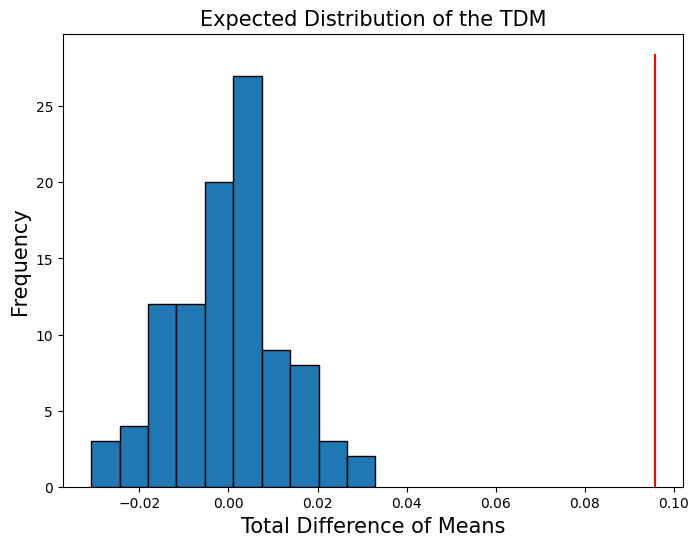

In [27]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.rc("axes", titlesize = 15)
plt.rc("axes", labelsize = 15)

plots, ax = plt.subplots(1, 1, figsize = (8, 6), dpi = 100)
ax.hist(
    is_severe_results_bw,
    edgecolor = "black"
)
plt.title("Expected Distribution of the TDM")
plt.xlabel("Total Difference of Means")
plt.ylabel("Frequency")
plt.plot([is_severe_statistic_observed_bw, is_severe_statistic_observed_bw], [ax.get_ylim()[0], ax.get_ylim()[1]], color = "red")

&emsp;&emsp;The distribution of $\Delta \mu_{total}$ under the null hypothesis is shown above with the red line representing the position of the observed $\Delta \mu_{total}$. Again, observe how the position of the observed value is all the way out in the extremes which is considered abnormally high for the expected distribution. Ideally, one would see the difference in rates close to 0, but the statistical test proves that the real difference in rates is statistically significant.

&emsp;&emsp;Through 100 random simulations to generate a distribution of the test statistic under the null hypothesis assumption, the test yielded a p-value of 0.0. In other words, one cannot expect, with any probability at all, to find a difference of 9.6% in a scenario where race is irrelevant. Because this value is below the significance level of 0.01, reject the null hypothesis with confidence that most likely, White individuals are being discriminated against in the dataset under Rawlsian Equality of Opportunity.

&emsp;&emsp;Note, however, that White individuals make up most of the dataset, and conditional on an individual being arrested, White individuals continue to compose the majority of the population as well. Since on avereage, regardless of severity, White individuals are arrested more often than Black individuals, it is possible that this overrepresentation has led to this difference in rates, and if this is case, then it cannot be interpreted into a social context, as the results are not accurately representative of the real world.

In [28]:
def make_severity_quantile_pivot(df, q):
    df_severity_total = df[["subject_race", "severity_total", "arrest_made"]]
    
    race_groups = [df_severity_total[df_severity_total["subject_race"] == race].sort_values(by = ["subject_race", "severity_total"], ascending = [True, False]) for race in df["subject_race"].unique()]
    race_groups_top_q = [race_group[:int(len(race_group)*q)] for race_group in race_groups]
    race_groups_top_q_aggregated = pd.concat(race_groups_top_q)
    pivot_race_groups = race_groups_top_q_aggregated.pivot_table(
        index = "subject_race",
        columns = "arrest_made",
        aggfunc = "size"
    )
    
    return pivot_race_groups

def sd_quantile(pivot_ratios):
    pivot_ratios_arrests = pivot_ratios[True]
    
    return pivot_ratios_arrests.std()

Applying Luck Egalitarian Equality of Opportunity
---
&emsp;&emsp;Assuming it is feasible to conduct a statistical investigation into a potential inequity, Luck Egalitarian Equality of Opportunity is statistically applied to the dataset by considering relative positions in the separate distributions of individuals between the varying races. The idea here is to check the arrest rates individuals considered severe who lie within the top $q$ quantiles of their relative distributions. If the variation in arrest rates is statistically significant, then there must exist a potential racial inequity in the data in the scope of Luck Egalitarian Equality of Opportunity.

First, use the severity rankings to create pivot tables to display arrest rates of individuals considered severe within the top $q$ quantiles of their racial category.

Pivot table showing arrest rates for the top 25% most severe individuals:

In [29]:
pivot_severity_quantile_25 = make_severity_quantile_pivot(data, 0.25)
pivot_severity_quantile_25_ratios = pivot_counts_to_ratios(pivot_severity_quantile_25)
pivot_severity_quantile_25_ratios

arrest_made,False,True
subject_race,,
Asian/Pacific Islander,0.970788,0.029212
Black,0.935599,0.064401
Hispanic,0.953347,0.046653
Other,0.984822,0.015178
White,0.967215,0.032785


Pivot table showing arrest rates for the top 50% most severe individuals:

In [30]:
pivot_severity_quantile_50 = make_severity_quantile_pivot(data, 0.5)
pivot_severity_quantile_50_ratios = pivot_counts_to_ratios(pivot_severity_quantile_50)
pivot_severity_quantile_50_ratios

arrest_made,False,True
subject_race,,
Asian/Pacific Islander,0.983795,0.016205
Black,0.964566,0.035434
Hispanic,0.973935,0.026065
Other,0.990333,0.009667
White,0.980739,0.019261


Pivot table showing arrest rates for the top 75% most severe individuals:

In [31]:
pivot_severity_quantile_75 = make_severity_quantile_pivot(data, 0.75)
pivot_severity_quantile_75_ratios = pivot_counts_to_ratios(pivot_severity_quantile_75)
pivot_severity_quantile_75_ratios

arrest_made,False,True
subject_race,,
Asian/Pacific Islander,0.987373,0.012627
Black,0.974230,0.025770
Hispanic,0.980310,0.019690
Other,0.992403,0.007597
White,0.985593,0.014407


&emsp;&emsp;Observe how from these three tables above, Black individuals of any top $q$ severity are arrested most often compared to Other individuals of the same $q$ who have the lowest rates of arrest. Note and recall that "Other" composes the smallest proportion of individuals in the racial makeup of the dataset, so these observations may not be surprising. Regardless of whether or not the statistical tests yield significant results, it is possible that this difference is due to underrepresentation of the Other category and not because of racial discrimination. If this is true, then any significant results coming from the analysis are likely to not be representative of what is truly observed outside of the data and is a mere byproduct of underrepresentation of the population.

&emsp;&emsp;Assuming that it is valid to perform a data analysis, three separate statistical tests are performed for the top 25%, 50%, and 75% most severe individuals in their respective distributions. Since Luck Egalitarian Equality of Opportunity holds if all arrest rates for the top $q$ most severe individuals between racial categories is the same, we formulate a statistical test as follows for each $q=\{0.25, 0.5, 0.75\}$:

- Null Hypothesis: For the top $q$ individuals in their respective distributions, the arrest rates between these distributions are less spread out, implying similarity.
- Alternative Hypothesis: For the top $q$ individuals in their respective distributions, the arrest rates between these distributions are more spread out, implying inequality.

Again, fix the significance level to be 0.01.

The test statistic to compute is the standard deviation, $\sigma$, of the arrest rates between races given $q$. As in applying Rawlsian Formal Equality of Opportunity, the reasoning is that larger values of $\sigma$ mean that the arrest rates are more spread out, so larger values are considered more extreme. On the other hand, we expect $\sigma \approx 0$ if Luck Egalitarian Equality of Opportunity holds since it implies that when comparing the top $q$ individuals in each category of their uncontrollable circumstance, they should be given the same utility.

Observed $\sigma$ for the statistical test with $q = 0.25$:

In [32]:
quantile_25_statistic_observed = sd_quantile(pivot_severity_quantile_25_ratios)
quantile_25_statistic_observed

0.018685022989194135

Observed $\sigma$ for the statistical test with $q = 0.5$:

In [33]:
quantile_50_statistic_observed = sd_quantile(pivot_severity_quantile_50_ratios)
quantile_50_statistic_observed

0.009847639941202376

Observed $\sigma$ for the statistical test with $q = 0.75$:

In [34]:
quantile_75_statistic_observed = sd_quantile(pivot_severity_quantile_75_ratios)
quantile_75_statistic_observed

0.006956835363464184

&emsp;&emsp;Notice how as $q$ increases, $\sigma$ decreases notably, from a spread of 0.018 to 0.009 to about 0.007. This means comparing more and more individuals of each racial category yields in more even and similar arrest rates (recall that $q$ is not a threshold for severity but rather a threshold for breadth of each racial category to analyze). This probably results from how the top severity of each racial category can differ (think maximum severity) which results in uneven arrest rates along with how having less people in a distribution can produce variation more easily. After all, 1 person's arrest in a group of 100 would mean more than 1 arrest in a group of 1,000,000. It is possible that the $q$ for the greatest $\sigma$ yielded is a good indicator of whether or not racial inequality is present because police officers could assign more reasons and / or arrest individuals of a particular race, producing observed outliers in the distribution of the top 25% most severe individuals of each racial category. If so, then the dataset is racially biased for which a statistical analysis would also turn up racially biased results.

In [35]:
q_statistics = {
    0.25: quantile_25_statistic_observed,
    0.5: quantile_50_statistic_observed,
    0.75: quantile_75_statistic_observed
}

q_results = {
    0.25: [],
    0.5: [],
    0.75: []
}

for q in q_statistics:
    severity_results = []
    data_severity_random = data[["subject_race", "severity_total", "arrest_made"]].copy()
    
    for i in range(100):
        shuffled_race = data_severity_random["subject_race"].sample(frac = 1, replace = False, random_state = i, ignore_index = True)
        data_severity_random["subject_race"] = shuffled_race
        pivot_severity_random = make_severity_quantile_pivot(data_severity_random, q)
        pivot_severity_random_ratios = pivot_counts_to_ratios(pivot_severity_random)
        statistic_simulated = sd_quantile(pivot_severity_random_ratios)
        severity_results.append(statistic_simulated)
    severity_p_value = (pd.Series(severity_results) >= q_statistics[q]).mean()
    #print(f"quantile: {q} \np-value: {severity_p_value} \nReject Null Hypothesis: {severity_p_value <= significance} \n")
    
    print(f"quantile: {q} \np-value: {severity_p_value}")
    
    q_results[q] = severity_results

quantile: 0.25 
p-value: 0.0
quantile: 0.5 
p-value: 0.0
quantile: 0.75 
p-value: 0.0


<Figure size 800x600 with 0 Axes>

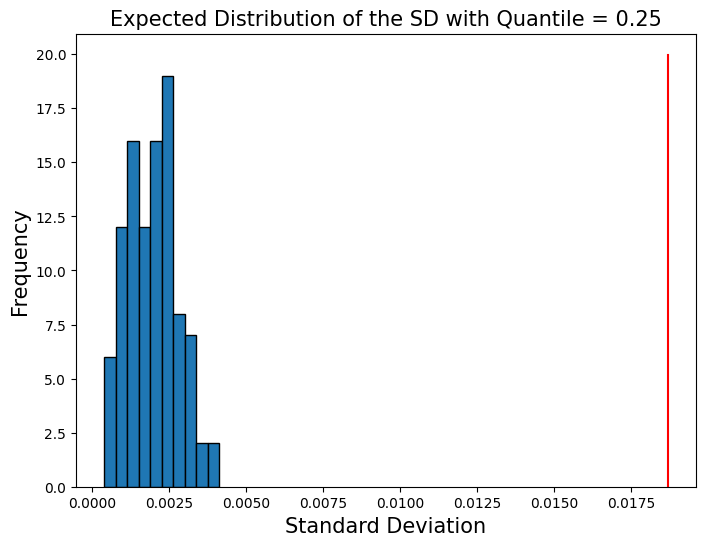

<Figure size 800x600 with 0 Axes>

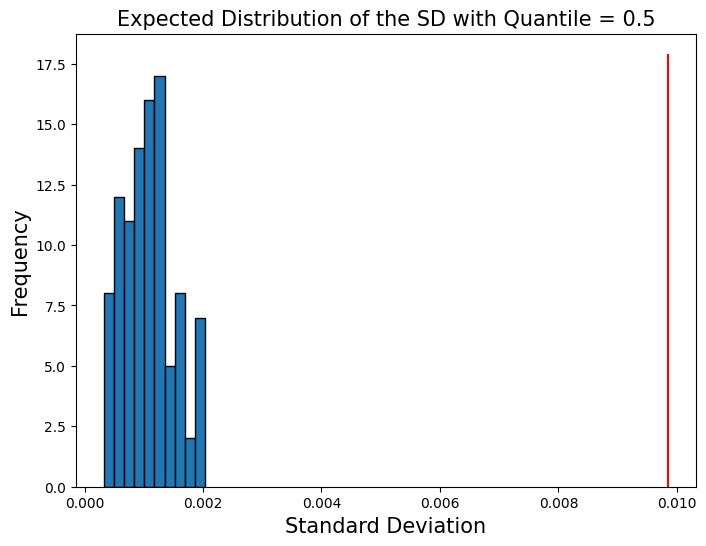

<Figure size 800x600 with 0 Axes>

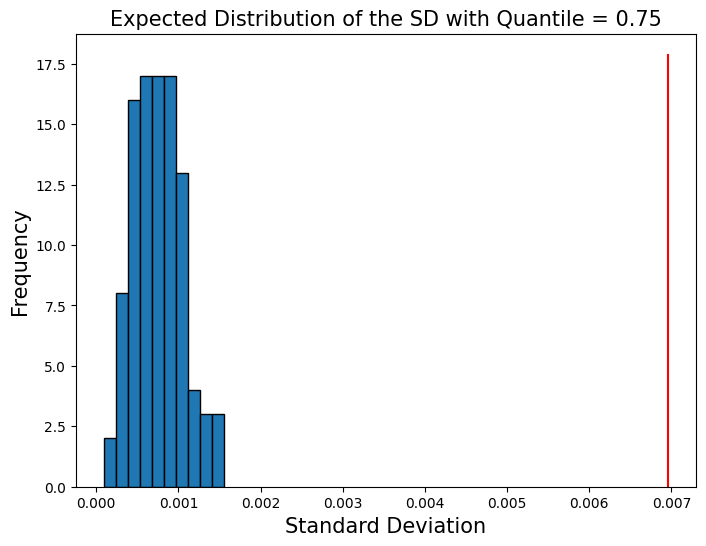

In [36]:
for q in q_statistics:
    plt.figure(figsize = (8, 6), dpi = 100)
    plt.rc("axes", titlesize = 15)
    plt.rc("axes", labelsize = 15)

    plots, ax = plt.subplots(1, 1, figsize = (8, 6), dpi = 100)
    ax.hist(
        q_results[q],
        edgecolor = "black"
    )
    plt.title(f"Expected Distribution of the SD with Quantile = {q}")
    plt.xlabel("Standard Deviation")
    plt.ylabel("Frequency")
    plt.plot([q_statistics[q], q_statistics[q]], [ax.get_ylim()[0], ax.get_ylim()[1]], color = "red")

&emsp;&emsp;Above are plots for each $q$ displaying the distribution of $\sigma$ under the null hypothesis with the red line representing the observed $\sigma$ at that $q$. Notice how the observed values of $\sigma$ are significantly further away from the expected distribution, meaning the variation in arrest rates for each $q$ are abnormal, hinting towards racial inequity.

&emsp;&emsp;Assuming it is appropriate to conduct a statistical test, performing 100 random simulations to generate a distribution of the test statistic under the null hypothesis assumption for each value of $q$ all yielded p-values of 0. In other words, all statistical tests performed in this part gave statistically significant results, as all imply that it is not expected at all to see the observed $\sigma$ values of 0.018, 0.009, and 0.007 for $q$ values of 0.25, 0.5, and 0.75, respectively. Reject the null hypothesis for each test with confidence that Luck Egalitarian Equality of Opportunity is not satisfied in any of these cases. Surprisingly, an observed value of 0.007 which seems rather close to 0.0, the ideal or expected value, for $q = 0.75$ is interesting because it means that the variation in the distribution of arrest rates for the top 75% most severe individuals across the races needs to be significantly lower in order to satisfy Luck Egalitarian Equality of Opportunity.

In [37]:
def diffs_in_means_bo_q(pivot_ratios):
    other_arrests = pivot_ratios.loc["Other"][True]
    black_arrests = pivot_ratios.loc["Black"][True]
    
    return black_arrests - other_arrests

&emsp;&emsp;Because the spread in arrest rates turned out to be statistically significant, a follow up test is conducted to determine which race is discriminated against in the dataset. Recall how from the pivot table of arrest rates between races for each value of $q$, Black individuals were consistently arrested more often than Other individuals. Ergo, to determine if this difference is statistically significant, we formulate statistical tests for each $q$ again as follows:

- Null Hypothesis: The arrest rate of the top $q$ most severe Black individuals are similar to the arrest rate of the top $q$ most severe "Other" individuals.
- Alternative Hypothesis: The arrest rate of the top $q$ most severe Black individuals tends to be higher than the arrest rate of the top $q$ most severe "Other" individuals.

Again, fix the significance level to be 0.01.

The test statistic here is in computing, $\Delta \mu$, the total difference in the arrest rate of the top $q$ most severe Black individuals compared to the arrest rate of the top $q$ most severe "Other" individuals. Thus, the test statistic is as follows:

$$\Delta \mu = \mu_{Black} - \mu_{Other}$$

&emsp;&emsp;Note that when calculating $\Delta \mu$, the arrest rate of Black individuals is subtracted by the arrest rate of Other individuals, so larger values are considered extreme by this test, as they imply that the difference between the rate of arrests for Black individuals and for Other individuals is statistically significant. If Luck Egalitarian Equality of Opportunity is satisfied, then we should expect $\Delta \mu \approx 0$ since it should hold that both the top $q$ most severe Black individuals and Other individuals in their respective distributions should have similar rates of arrests.

Observed $\Delta \mu$ for the statistical test with $q = 0.25$:

In [38]:
quantile_25_statistic_observed_bo = diffs_in_means_bo_q(pivot_severity_quantile_25_ratios)
quantile_25_statistic_observed_bo

0.049222743163981335

Observed $\Delta \mu$ for the statistical test with $q = 0.5$:

In [39]:
quantile_50_statistic_observed_bo = diffs_in_means_bo_q(pivot_severity_quantile_50_ratios)
quantile_50_statistic_observed_bo

0.025766655379777566

Observed $\Delta \mu$ for the statistical test with $q = 0.75$:

In [40]:
quantile_75_statistic_observed_bo = diffs_in_means_bo_q(pivot_severity_quantile_75_ratios)
quantile_75_statistic_observed_bo

0.018172875698080307

&emsp;&emsp;Notice again how as $q$ increases, the observed test statistic, though different, decreases and seems to head closer and closer to 0. For the same reasons as before, it is possible that subjective data collection led to these differences, being more skewed and varied at the top rather than at the bottom of the distributions. Also, it is important not to forget that the Other category has the lowest number of individuals in both the total population and the population of arrested individuals, meaning that individuals classified as "Other" are underrepresented, so any significant results could inaccurate because of these issues.

In [41]:
q_statistics_bo = {
    0.25: quantile_25_statistic_observed_bo,
    0.5: quantile_50_statistic_observed_bo,
    0.75: quantile_75_statistic_observed_bo
}

q_results_bo = {
    0.25: [],
    0.5: [],
    0.75: []
}

data_bo = data[data["subject_race"].isin(["Black", "Other"])].copy().reset_index(drop = True)
for q in q_statistics_bo:
    severity_results_bo = []
    data_severity_random_bo = data_bo[["subject_race", "severity_total", "arrest_made"]].copy()
    
    for i in range(100):
        shuffled_race = data_bo["subject_race"].sample(frac = 1, replace = False, random_state = i, ignore_index = True)
        data_severity_random_bo["subject_race"] = shuffled_race
        pivot_severity_random_bo = make_severity_quantile_pivot(data_severity_random_bo, q)
        pivot_severity_random_ratios_bo = pivot_counts_to_ratios(pivot_severity_random_bo)
        statistic_simulated = diffs_in_means_bo_q(pivot_severity_random_ratios_bo)
        severity_results_bo.append(statistic_simulated)
    severity_p_value_bo = (pd.Series(severity_results_bo) >= q_statistics_bo[q]).mean()
    #print(f"quantile: {q} \np-value: {severity_p_value_bo} \nReject Null Hypothesis: {severity_p_value_bo <= significance} \n")
    print(f"quantile: {q} \np-value: {severity_p_value_bo}")
    
    q_results_bo[q] = severity_results_bo

quantile: 0.25 
p-value: 0.0
quantile: 0.5 
p-value: 0.0
quantile: 0.75 
p-value: 0.0


In [42]:
"""
#plt.figure(figsize = (8, 6))
plots, axes = plt.subplots(2, 2, figsize = (16, 12), dpi = 100)
qs = list(q_statistics.keys())
index = 0
for array in axes:
    for ax in array:
        if index > 2:
            ax.axis("off")
            break
        ax.hist(
            q_results_bo[qs[index]],
            edgecolor = "black"
        )
        ax.plot(
            [q_statistics_bo[qs[index]], q_statistics_bo[qs[index]]],
            [ax.get_ylim()[0], ax.get_ylim()[1]],
            color = "red"
        )
        ax.set_title(f"Expected Distribution of the DM with Quantile = {qs[index]}")
        ax.set_xlabel("Difference of Means")
        ax.set_ylabel("Frequency")
        index += 1
"""
print('', end = '')

<Figure size 800x600 with 0 Axes>

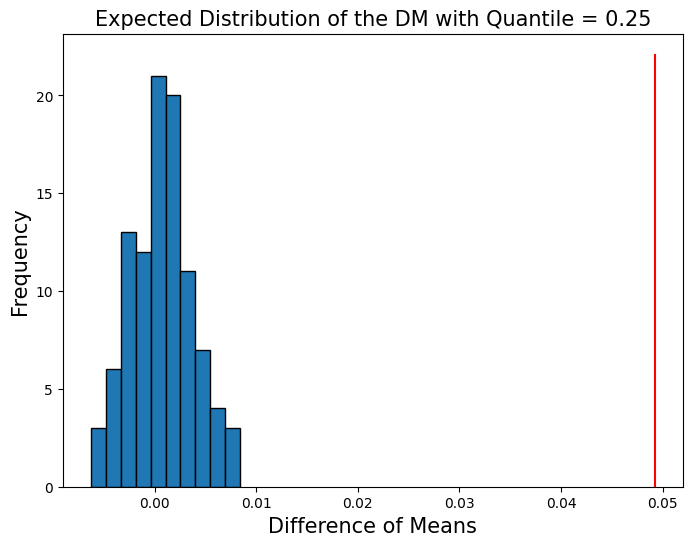

<Figure size 800x600 with 0 Axes>

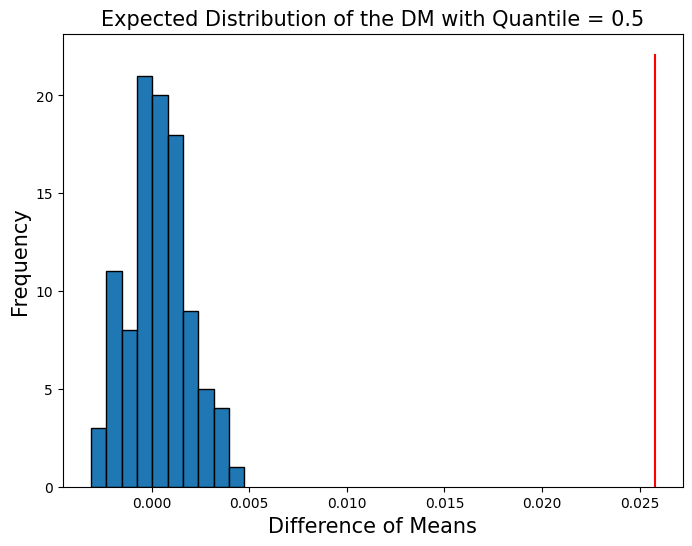

<Figure size 800x600 with 0 Axes>

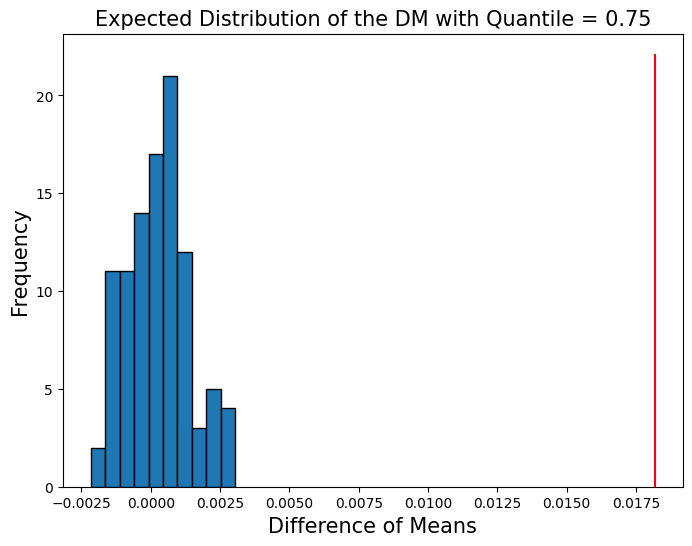

In [43]:
for q in q_statistics_bo:
    plt.figure(figsize = (8, 6), dpi = 100)
    plt.rc("axes", titlesize = 15)
    plt.rc("axes", labelsize = 15)

    plots, ax = plt.subplots(1, 1, figsize = (8, 6), dpi = 100)
    ax.hist(
        q_results_bo[q],
        edgecolor = "black"
    )
    plt.title(f"Expected Distribution of the DM with Quantile = {q}")
    plt.xlabel("Difference of Means")
    plt.ylabel("Frequency")
    plt.plot([q_statistics_bo[q], q_statistics_bo[q]], [ax.get_ylim()[0], ax.get_ylim()[1]], color = "red")

&emsp;&emsp;Above are plots for each $q$ displaying the distribution of $\Delta \mu$ under the null hypothesis with the red line representing the observed $\Delta \mu$ at that $q$. Like before, notice how the observed values of $\Delta \mu$ are considerably far from the expected distribution of $\Delta \mu$ for each $q$. This indicates that the observed difference in arrest rates is too significant to be attributed to random variation.

&emsp;&emsp;Again, assuming it is appropriate to perform a statistical test, 100 random simulations were conducted to generate a distribution of the test statistic under the null hypothesis assumption for each value of $q$ with all tests yielding p-values of 0. Reiterating similar implications from before, this means assuming that race is irrelevant to making arrests, there is absolutely no chance whatsoever of seeing differences in arrest rates between Black and Other individuals as high as 0.049, 0.026, 0.018 for $q$ values of 0.25, 0.5, and 0.75, respectively. Thus, reject the null hypothesis with confidence that Luck Egalitarian Equality of Opportunity is violated for Black and Other individuals.

# Conclusions

&emsp;&emsp;Overall, all of the hypothesis tests performed generated statistically significant results. This section discusses the findings at both a technical and sociological level with respect to the two definitions of fairness given.

Rawlsian Formal Equality of Opportunity
---
&emsp;&emsp;To summarize, two separate statistical tests were performed with Rawlsian Formal Equality of Opportunity in mind: a hypothesis test to determine if the arrest rates for individuals of the same classification of severity were similar, and second, a hypothesis test to ascertain which race was being discriminated against as a follow up. For the first test examining the $\sigma_{total}$ of arrest rates between races for individuals both severe / not severe, the observed value is completely out in the extremes of the expected distribution of the $\sigma_{total}$ under the null hypothesis as shown in the histogram. Coinciding with a p-value of 0.0, meaning that there is 0% chance of seeing a value as extreme as a $\sigma_{total} = 0.04$, and coupled with a significance level of 0.01, one can be extremely confident that the observed arrest rates between the races is too spread out to be declared "similar" or "equal". Then, as a follow up, another hypothesis test examined the difference in arrest rates between Black individuals and White individuals; the results were similar in that it yielded an observed $\Delta \mu_{total}$ seen totally in the extremes of the expected distribution under the null hypothesis assumption alongisde a p-value of 0.0. In essence, under Rawlsian Formal Equality of Opportunity, there does exist a potential racial inequity in the data with possibly White individuals being arrested more often than Black individuals. Because of how White individuals of the same criminality as Black individuals tend to be arrested more, Rawlsian Formal Equality of Opportunity is not satisfied.

Luck Egalitarian Equality of Opportunity
---
&emsp;&emsp;Moving onto Luck Egalitarian Equality of Opportunity, this definition of distributive justice was applied with a similar method as with Rawlsian Formal Equality of Opportunity: a hypothesis test for separate $q$ quantile values to determine if the data satisfies Luck Egalitarian Equality of Opportunity or not, and another as a follow up to ascertain which race was being discriminated against in the dataset. For the first test examining the $\sigma$ of arrest rates for the top $q$ most severe individuals in their respective racial categories, the observed values are completely extreme compared to the expected distributions of the $\sigma$ under the null hypothesis at each $q$ as shown in the histograms. Coupled with p-values of 0.0, one can be extremely confident that the observed arrest rates for each value of $q$ is too spread out to be classified as "similar" or "equal". Following this conclusion, another hypothesis test examined the difference in arrest rates between Black individuals and Other individuals; consequently, it yielded similar results with p-values of 0.0 for each $q$ with extreme observed values of $\Delta \mu$. Undoubtedly, under Luck Egalitarian Equality of Opportunity, there does exist a potential racial inequity in the data with possibly Black individuals being arrested more often than Other individuals. For each distribution of the top $q$ most severe Black and Other individuals given the same $q$, Black individuals are disproportionately arrested more often when the rates should be similar to that of the Other category under this notion of fairness. Hence, Luck Egalitarian Equality of Opportunity is violated.

Limitations
---
&emsp;&emsp;Clearly, all of the statistical tests performed in this paper had significant results. Not only is Rawlsian Formal Equality of Opportunity violated in the dataset, it also fails to meet Luck Egalitarian Equality of Opportunity. Two major implications are implied thus far: White individuals are possibly arrested more often than Black individuals even with the same severity, and Black individuals are arrested more often than Other individuals when considering relative distributions. 

&emsp;&emsp;The first conclusion possibly results from a relative overrepresentation of White individuals in the dataset, as they compose the majority of the records. As stated before, overrepresentation does mean that even without any conditions, White individuals are more often stopped and arrested than any other racial category. With this in mind, it could be the case that the results yielded by the statistical tests are inaccurate due to this overrepresentation. Another cause could be the issue of infra-marginality as discussed by Simoiu, Corbett-Davies, and Goel (2017) who posit that different races have differing behaviors which can lead to disproportionate rates in treatment even if there is no racial discrimination. If White individuals engage in behavior that put them at higher risk of being stopped / searched / arrested compared to Black individuals, then the results from the statistical tests have come about because of infra-marginality and / or overrepresentation and not because of discrimination against White individuals.

&emsp;&emsp;Second, the conclusion that Black individuals are arrested more often than Other individuals under Luck Egalitarian Equality of Opportunity could be due to underrepresentation of the Other category. After all, they compose the least amount of individuals in the dataset's population and also in the population of arrested individuals. Infra-marginality can also be at play here, relative to Other individuals, that put Black individuals at a higher risk of being stopped / searched / arrested. If any of this is true, then the statistically significant results yielded by the tests are a result of infra-marginality and / or underrepresentation and not because of discrimination against Black individuals relative to the Other group.

&emsp;&emsp;Taking a step back to think about the results and the data more generally now, recall from the conclusions and considerations made at the end of the Data Exploration section about the presence of sampling bias, race label ambiguity, subjectivity of data collection, and reasons to stop / search an individual as a proxy measurement of criminality. Because of possible sampling bias with police officers stopping individuals of certain races more often, White individuals are overrepresented in the dataset with Other individuals underrepresented. Because of how each race label is ambiguous and fails to accommodate for multiracial individuals, some individuals could have been incorrectly classified, or multiracial individuals could have been counted for different races, leading not only to outliers but also misrepresentation in the racial category they are placed in. Much of these issues originate from the subjectivity of data collection which is left up to individual police officers to record traffic stop incidents rather than having a more centralized system to collect data. Of course, because judging by appearance is subjective, police officers can make mistakes in classifying people into racial categories along with adding more reasons to stop / search an individual impicitly because of racial biases. Even setting aside racial biases, police officers are bound to make mistakes in allocating reasons to stop / search an individual, possibly misjudging an individual based off of subjective views. On the topic of measurements, the severity score used in this paper is a proxy at best for an individual's criminality and has the flaws of assuming that each reason is weighted the same in addition to how individual police officers can possibly add more reasons for individuals of certain races based off of implicit bias. This is not to mention how, recalling the issue of focusing on the whole dataset because of a lack in negative labels, the data says nothing about people who were not stopped at all or people who were stopped but not recorded. Speaking of sampling bias, their lack of representation in the dataset is ultimately a product of not having a proper system for collecting data, and this issue could lead to misrepresentation in the dataset with numbers skewing a certain way and affecting analysis. Finally, adding on the potential problem of infra-marginality where people of differing races can have differing behaviors, it is possible that even without any racial discrimination present in the data, people of one race may be arrested more often or less often than another because of their behaviors. Considering all of this, there are a cornucopia of holes and inconsistencies in the dataset that ultimately put the validity of this paper's statistical analysis at risk due to issues of data collection in sampling bias or encoding implicit biases, measurement, and possible infra-marginality. Otherwise, under an abundance of assumptions to validate analyzing the data, there are clear and present racial inequities in San Diego police traffic stops and in particular, disparate treatment in arresting individuals of differing races, violating both Rawlsian Formal Equality of Opportunity and Luck Egalitarian Equality of Opportunity.

# References

Arcas, B. A. y. (2017, May 20). Physiognomy's new clothes. Medium. Retrieved May 5, 2022, from https://medium.com/@blaisea/physiognomys-new-clothes-f2d4b59fdd6a 

Baumgartner, F. R., Epp, D. A., Shoub, K., & Love, B. (2017). Targeting young men of color for search and arrest during traffic stops: evidence from North Carolina, 2002–2013, Politics, Groups, and Identities, 5:1, 107-131, DOI: 10.1080/21565503.2016.1160413

Buolamwini, J. (2017, May 29). Algorithms aren't racist. Your skin is just too dark. Hackernoon. Retrieved May 5, 2022, from https://hackernoon.com/algorithms-arent-racist-your-skin-is-just-too-dar 

Chanin, J., Welsh, M., Nurge, D. (2018). Traffic Enforcement Through the Lens of Race: A Sequential Analysis of Post-Stop Outcomes in San Diego, California. Criminal Justice Policy Review, Vol. 29(6-7), 561-583.

D’Ignazio, C., & Klein, L. (2020). 1. The Power Chapter. *Data Feminism*. Retrieved from https://data-feminism.mitpress.mit.edu/pub/vi8obxh7

Heidari, H., Loi, M., Gummadi, K. P., Krause, A. (2018). A Moral Framework for Understanding of Fair ML through Economic Models of Equality of Opportunity.

Pierson, E., Simoiu, C., Overgoor, J., Corbett-Davies, S., Jenson, D., Shoemaker, A., Ramachandran, V., Barghouty, P., Phillips, C., Shroff, R., & Goel, S. (2020). A large-scale analysis of racial disparities in police stops across the United States. Nature Human Behaviour, Vol. 4, 2020.

Lamont, J., &amp; Favor, C. (2017, September 26). Distributive justice. Stanford Encyclopedia of Philosophy. Retrieved May 5, 2022, from https://plato.stanford.edu/entries/justice-distributive/ 

Legal Information Institute. (n.d.). Probable cause. Legal Information Institute. Retrieved May 5, 2022, from https://www.law.cornell.edu/wex/probable_cause 

Simoiu, C., Corbett-Davies, S., &amp; Goel, S. (2017). The problem of infra-marginality in outcome tests for discrimination. The Annals of Applied Statistics, 11(3). https://doi.org/10.1214/17-aoas1058 

U.S. Constitution | Constitution Annotated - Library of Congress. Library of Congress. (n.d.). Retrieved May 5, 2022, from https://constitution.congress.gov/constitution/ 